# Line plot sectoral demand and feedstock supply

In [1]:
# Data modification
import pandas as pd
import numpy as np
import pyam

# Geospatial
import geopandas as gpd

# System
from pathlib import Path
import os

# Plotting
import matplotlib.pyplot as plt

# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Output directory

In [2]:
out_dir = Path.cwd() / ".." / "output_data"

In [3]:
out_fig_dir = Path.cwd() / ".." / "output_figures"

In [4]:
input_dir = Path.cwd() / ".." / "input_data"

# Get a list of EU countries
sheets_dict = pd.read_excel(f"{input_dir}/FN_WP5_Feedstocks_High_Bioenergy_v2_shared.xlsx", sheet_name=None)

excluded_sheets = {"Cover", "info"}
eu_countries = [k for k in sheets_dict.keys() if k not in excluded_sheets]

In [5]:
# Make output_dir for each country
for iso in eu_countries:
    iso_path = os.path.join(out_fig_dir, iso)
    
    try:
        os.mkdir(iso_path)
    
    except FileExistsError:
        # If directory already exists
        pass

# Scenario data

In [6]:
# Scenario data is a processed dataset, it is stored in output_data directory
master_df = pyam.IamDataFrame(pd.read_csv(f"{input_dir}/master_scenarios_aggregated.csv"))

# Calculate total bioenergy demand

In [7]:
sectoral_demand = [
    "Electricity And District Heat Demand",
    "Household Demand",
    "Industry Demand",
    "Tertiary And Other Demand",
    "Transport Demand"
]

In [8]:
for v in sectoral_demand:
    master_df.rename(
        variable={v : f"Bioenergy Demand|{v}"},
        inplace=True
    )

In [9]:
master_df.filter(
    variable="*Demand",
).variable

['Bioenergy Demand|Electricity And District Heat Demand',
 'Bioenergy Demand|Household Demand',
 'Bioenergy Demand|Industry Demand',
 'Bioenergy Demand|Tertiary And Other Demand',
 'Bioenergy Demand|Transport Demand']

In [10]:
calc_total_demand = master_df.filter(
    variable="*Demand",
)

total_demand = calc_total_demand.aggregate("Bioenergy Demand")

In [11]:
# Expected = (168, 8)
total_demand.timeseries().shape

(168, 8)

In [12]:
# Combine to master_df
master_df = pyam.concat([master_df, total_demand])

In [13]:
# Expected = (41328, 8)
master_df.timeseries().shape

(41328, 8)

In [14]:
# Total feedstock supply == total bioenergy demand, so we don't need to calculate it again

# Line plot

In [15]:
print(out_fig_dir)

/Users/firzariany/Documents/repo/forest_data_analysis/notebook/../output_figures


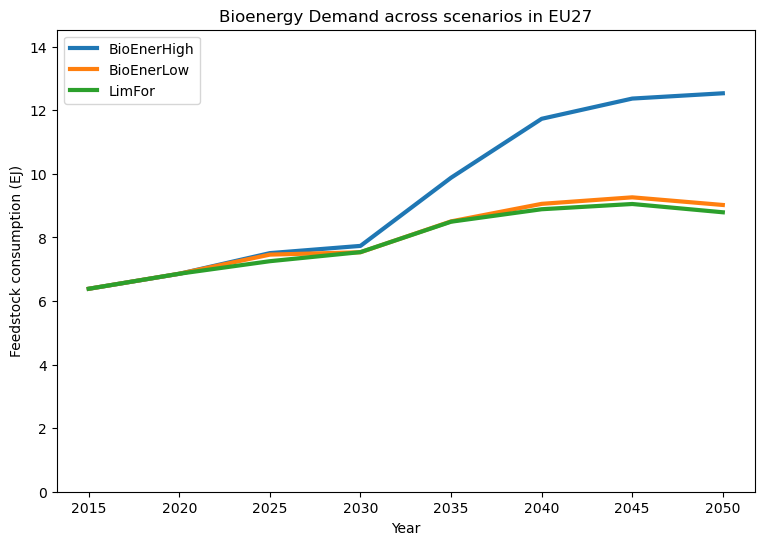

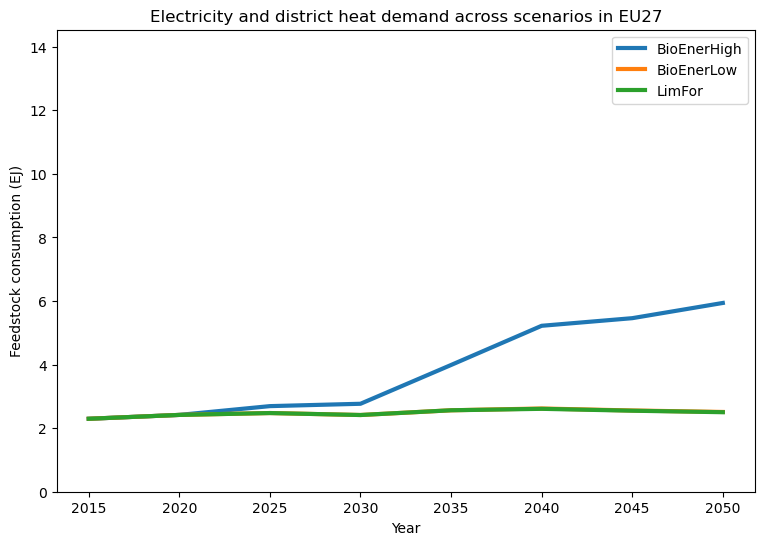

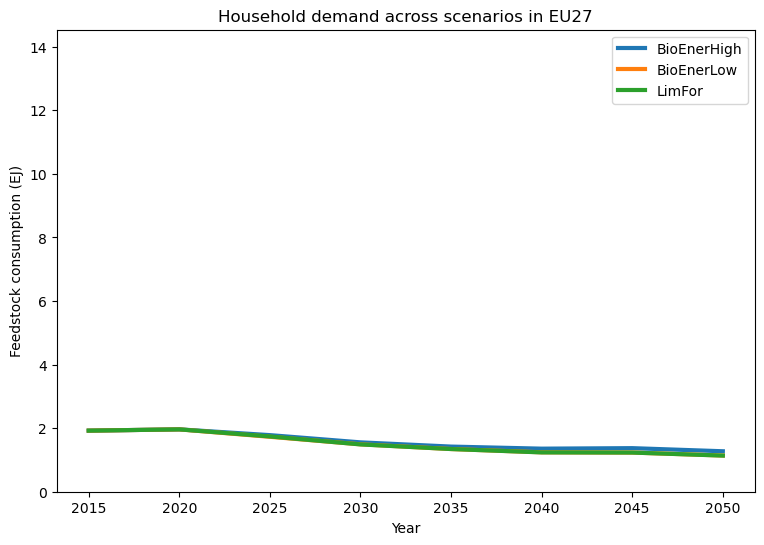

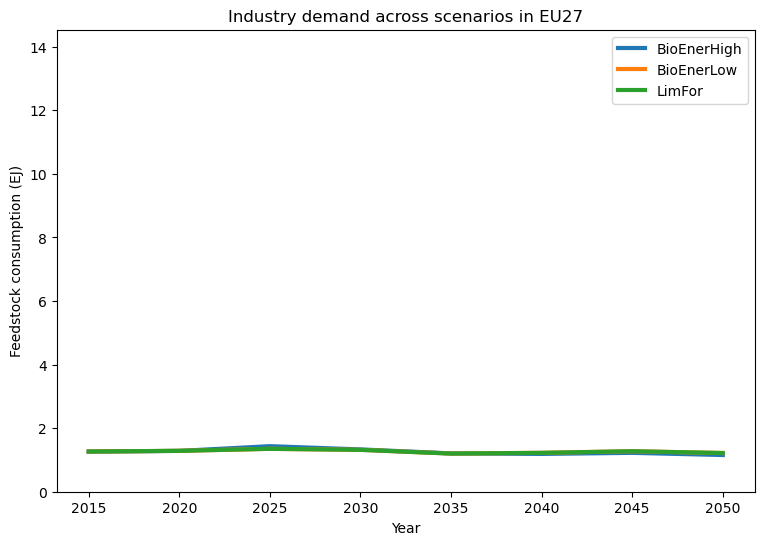

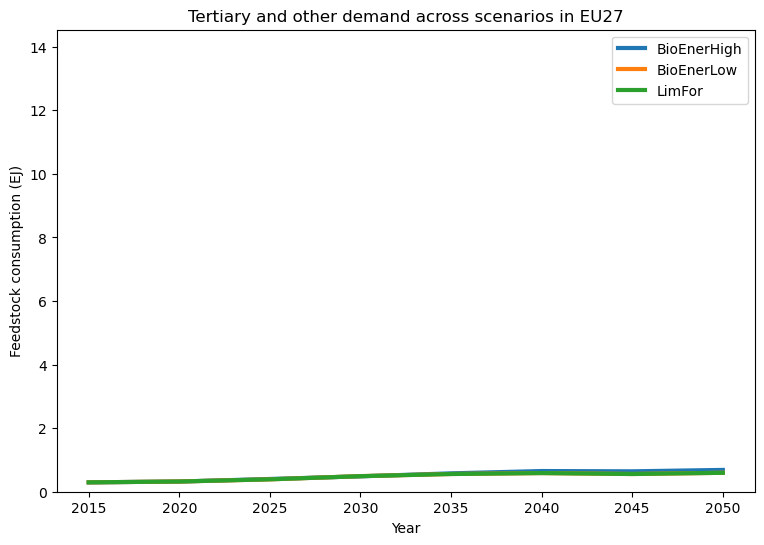

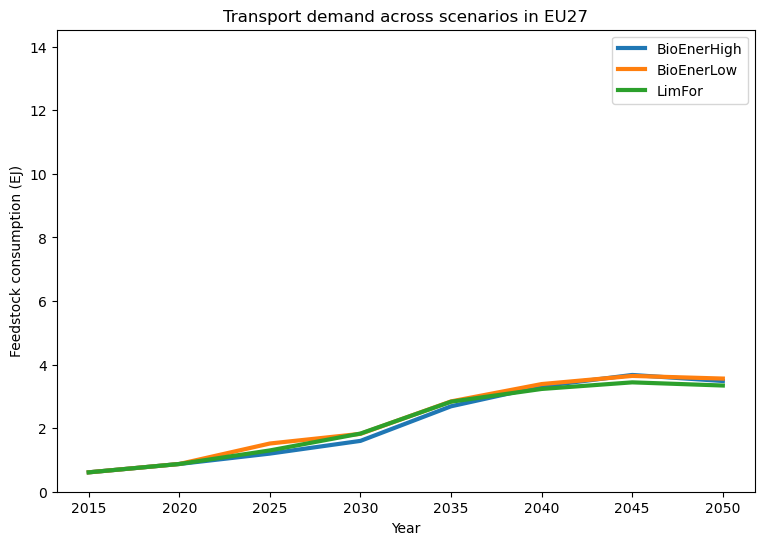

In [16]:
# Scaled to total bioenergy demand at a national level

sel_var = master_df.filter(variable="Bioenergy Demand*").variable

for v in sel_var:
    fig, ax = plt.subplots(figsize=(9, 6))

    data = master_df.filter(variable=v, region="EU27", unit="EJ")
    data.plot(color="scenario", ax=ax, linewidth=3)

    if v != "Bioenergy Demand":
        strip = v.split("|")
        title = strip[1].capitalize()
    
    else:
        title = v

    ax.set(
        title=f"{title} across scenarios in EU27",
        ylabel="Feedstock consumption (EJ)",
        xlabel="Year"
    )

    max_across_scene = (
        master_df
        .filter(variable="Bioenergy Demand", region="EU27", unit="EJ")
        .timeseries()
        .max(axis=1)
    )
    get_y_max = max_across_scene.max() + 2

    # Set ylim
    ax.set_ylim(0, get_y_max)

    plt.savefig(f"{out_fig_dir}/EU27/{title}_EU27_across_scenarios.png", dpi=300)
    

In [17]:
from IPython.display import clear_output

In [28]:
sel_var = master_df.filter(variable="Bioenergy Demand*").variable

In [32]:
data = master_df.filter(
    variable="Bioenergy Demand", 
    region="CY", 
    unit="EJ"
)

In [33]:
data.timeseries()

2015      2020  \
model     scenario    region variable         unit                       
D5.1 Data BioEnerHigh CY     Bioenergy Demand EJ    0.003453  0.003447   
          BioEnerLow  CY     Bioenergy Demand EJ    0.003453  0.003443   
          LimFor      CY     Bioenergy Demand EJ    0.003453  0.003443   

                                                        2025      2030  \
model     scenario    region variable         unit                       
D5.1 Data BioEnerHigh CY     Bioenergy Demand EJ    0.005285  0.009726   
          BioEnerLow  CY     Bioenergy Demand EJ    0.005903  0.009926   
          LimFor      CY     Bioenergy Demand EJ    0.005111  0.009960   

                                                        2035      2040  \
model     scenario    region variable         unit                       
D5.1 Data BioEnerHigh CY     Bioenergy Demand EJ    0.015194  0.021926   
          BioEnerLow  CY     Bioenergy Demand EJ    0.014327  0.021300   
          LimFor      CY     Bioenergy Demand EJ    0.014555  0.019974   

                                                        2045      2050  
model     scenario    region variable         unit                      
D5.1 Data BioEnerHigh CY     Bioenergy Demand EJ    0.029124  0.033905  
          BioEnerLow  CY     Bioenergy Demand EJ    0.028297  0.033712  
          LimFor      CY     Bioenergy Demand EJ    0.026555  0.031090

<Axes: title={'center': 'model: D5.1 Data - region: CY - variable: Bioenergy Demand'}, xlabel='Year', ylabel='EJ'>

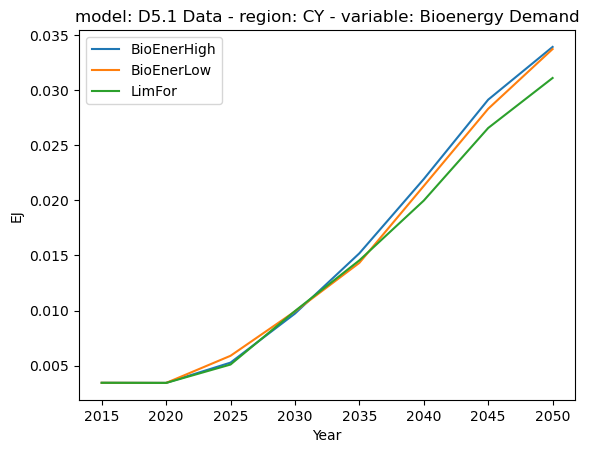

In [34]:
data.plot()

In [51]:
# Not scaled to total bioenergy demand at a national level

sel_var = master_df.filter(variable="Bioenergy Demand*").variable

for v in sel_var:

    for reg in master_df.region:

        fig, ax = plt.subplots(figsize=(9, 6))
        data = master_df.filter(variable=v, region=reg, unit="EJ")
        data.plot(ax=ax, color="scenario", linewidth=2)

        if v != "Bioenergy Demand":
            strip = v.split("|")
            title = strip[1].capitalize()

        else:
            title = v.capitalize()

        ax.set(
            title=f"{title} across scenarios in {reg}",
            ylabel="Feedstock consumption (EJ)",
            xlabel="Year"
        )

        max_across_scene = data.timeseries().max(axis=1)
        upper_lim = max_across_scene.max() * 0.1
        get_y_max = max_across_scene.max() + upper_lim

        # Set ylim
        ax.set_ylim(0, get_y_max)

        plt.savefig(f"{out_fig_dir}/{reg}/{title}_across_scenarios.png", dpi=300)
        print("Check the figure in", f"../output_figures/{reg}/{title}...")

        plt.close()
        

Check the figure in ../output_figures/AT/Bioenergy demand...
Check the figure in ../output_figures/BE/Bioenergy demand...
Check the figure in ../output_figures/BG/Bioenergy demand...
Check the figure in ../output_figures/CY/Bioenergy demand...
Check the figure in ../output_figures/CZ/Bioenergy demand...
Check the figure in ../output_figures/DE/Bioenergy demand...
Check the figure in ../output_figures/DK/Bioenergy demand...
Check the figure in ../output_figures/EE/Bioenergy demand...
Check the figure in ../output_figures/EL/Bioenergy demand...
Check the figure in ../output_figures/ES/Bioenergy demand...
Check the figure in ../output_figures/EU27/Bioenergy demand...
Check the figure in ../output_figures/FI/Bioenergy demand...
Check the figure in ../output_figures/FR/Bioenergy demand...
Check the figure in ../output_figures/HR/Bioenergy demand...
Check the figure in ../output_figures/HU/Bioenergy demand...
Check the figure in ../output_figures/IE/Bioenergy demand...
Check the figure in ..